In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
# img = cv2.imread('../images_jpg_mask/IMG_5576.JPG', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('../images_jpg/IMG_5576.JPG')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_CUBIC)

In [90]:
faces = face_cascade.detectMultiScale(img, 1.1, 1)
cropped_face = None
print(faces)
for (x, y, w, h) in faces:
    copy_img = img.copy()
#     cv2.rectangle(copy_img, (x,y), (x+w, y+h), (255,0), 2)
    cropped_face = copy_img[y:y+h, x:x+w].copy()
    
    

[[ 11  26 208 208]
 [ 55  99 126 126]]


### GET SMALLEST DETECTED FACE!

In [88]:
np.argwhere(faces[:, 2] == np.min(faces[:, 2]))

array([[1]], dtype=int64)

In [37]:
print(cropped_face)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [151 161 162]
  ...
  [223 235 239]
  [206 221 224]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [171 177 172]
  ...
  [196 204 203]
  [190 198 198]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [168 174 169]
  ...
  [219 227 226]
  [208 216 215]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [5]:
cv2.imshow('Image', copy_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

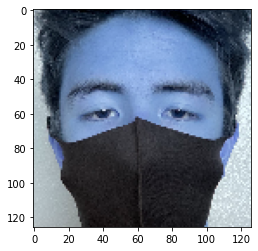

In [91]:
plt.imshow(cropped_face, cmap='gray')

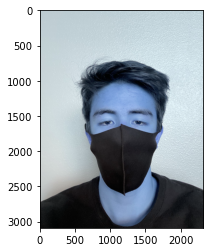

In [60]:
plt.imshow(img, cmap='gray')

### Video Capture

In [92]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        # IMPORTANT FOR WHAT YOU ACTAULLY WANT TO RECORD FOR YOUR DEMO - MAKE SURE YOU CHANGE COLOR FOR MASK OR NO MASK!!
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, 'Text Here', (x,y), cv2.FONT_HERSHEY_PLAIN, 3, (0,255,0), 2)
    # Display
    cv2.imshow('img', img)
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
# Release the VideoCapture object
cap.release()

KeyboardInterrupt: 

### MEDIAPIPE - THIS IS THE CORRECT SOLUTION

In [1]:
!pip install mediapipe

In [1]:
import mediapipe as mp

In [2]:
faceDetect = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
detection = faceDetect.FaceDetection()

In [12]:
IMG_H, IMG_W, IMG_C = img.shape
results = detection.process(img)
if results.detections:
    face = results.detections[0]
    info = face.location_data.relative_bounding_box
    x, y, w, h = info.xmin*IMG_W, info.ymin*IMG_H, info.width*IMG_W, info.height*IMG_H
    x,y,w,h =int(x), int(y), int(w), int(h)
    cropped_n = img[y:y+h, x:x+w, :]

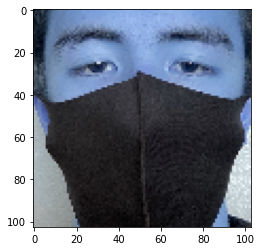

In [27]:
plt.imshow(cropped_n)